In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load dataset
data = pd.read_excel('../Listings.xlsx')
data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [2]:
# Read the Excel file
df = pd.read_excel('ElectricVehiclesInfoFromShowroomLinks.xlsx')

# Select only the specified columns
msrp_data = df[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type','MSRP', 'Range']]

msrp_data.head()

,Year,Make,Model,Fuel Type,Car Type,MSRP,Range
0,2021,Porsche,Taycan,Electric,Wagon 4WD,176600,437
1,2021,Hyundai,IONIQ,Electric,Elite FWD,49970,373
2,2019,Tesla,Model S,Electric,Hatchback 4WD,127885,511
3,2022,Tesla,Model 3,Electric,Sedan RWD,65500,556
4,2020,Tesla,Model 3,Electric,Sedan RWD,73900,620


In [3]:
# Define the columns to check for duplicates
columns_to_check = ['Year', 'Make', 'Model', 'Price', 'Mileage', 'Location']

before_removal = len(data)

# Drop duplicates based on the specified columns
data_unique = data.drop_duplicates(subset=columns_to_check)

after_removal = len(data_unique)

removed = before_removal - after_removal

print(removed)

data_unique.head()

172


,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [4]:
# Perform the merge
merged_data = pd.merge(
    data_unique,
    msrp_data[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type', 'MSRP', 'Range']],
    on=['Year', 'Make', 'Model', 'Fuel Type', 'Car Type'],
    how='inner'
)

# Display the merged data
merged_data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP,Range
0,2021,Tesla,Model 3,44990,25544,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711775997,Drive,OTHER,59900,423
1,2021,Tesla,Model 3,47990,23104,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776120,Drive,OTHER,59900,423
2,2021,Tesla,Model 3,45990,27200,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776551,Drive,OTHER,59900,423
3,2021,Tesla,Model 3,44950,66471,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711776615,Drive,OTHER,59900,423
4,2021,Tesla,Model 3,43490,50985,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711777483,Drive,OTHER,59900,423


In [5]:
import datetime

# Calculate the Retention Rate
merged_data['Retention Rate'] = merged_data['Price'] / merged_data['MSRP']

# Calculate the Age of the cars
current_year = datetime.datetime.now().year
merged_data['Age'] = current_year - merged_data['Year']
merged_data = merged_data[merged_data['Age'] > 0]



merged_data['Fuel Type Adjusted'] = merged_data.apply(lambda x:
                                        ('Electric' if x['Fuel Type'] == 'Electric' else
                                         ('Hybrid' if x['Fuel Type'] == 'Hybrid' else 'Conventional')),
                                        axis=1)


merged_data.head()

#merged_data.to_csv("merged_data.csv", index=False)

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP,Range,Retention Rate,Age,Fuel Type Adjusted
0,2021,Tesla,Model 3,44990,25544,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711775997,Drive,OTHER,59900,423,0.751085,3,Electric
1,2021,Tesla,Model 3,47990,23104,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776120,Drive,OTHER,59900,423,0.801169,3,Electric
2,2021,Tesla,Model 3,45990,27200,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776551,Drive,OTHER,59900,423,0.767780,3,Electric
3,2021,Tesla,Model 3,44950,66471,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711776615,Drive,OTHER,59900,423,0.750417,3,Electric
4,2021,Tesla,Model 3,43490,50985,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711777483,Drive,OTHER,59900,423,0.726043,3,Electric


Age 1 Linear Regression:
  Gradient: -0.0004
  Intercept: 1.0630
  R^2: 0.0331
  P-value: 2.1220e-04

Age 2 Linear Regression:
  Gradient: -0.0002
  Intercept: 0.8427
  R^2: 0.0244
  P-value: 5.0237e-02

Age 3 Linear Regression:
  Gradient: 0.0001
  Intercept: 0.7419
  R^2: 0.0156
  P-value: 9.8060e-02

Age 4 Linear Regression:
  Gradient: -0.0001
  Intercept: 0.6446
  R^2: 0.0173
  P-value: 2.5119e-01

Age 5 Linear Regression:
  Gradient: -0.0000
  Intercept: 0.6068
  R^2: 0.0065
  P-value: 5.2164e-01



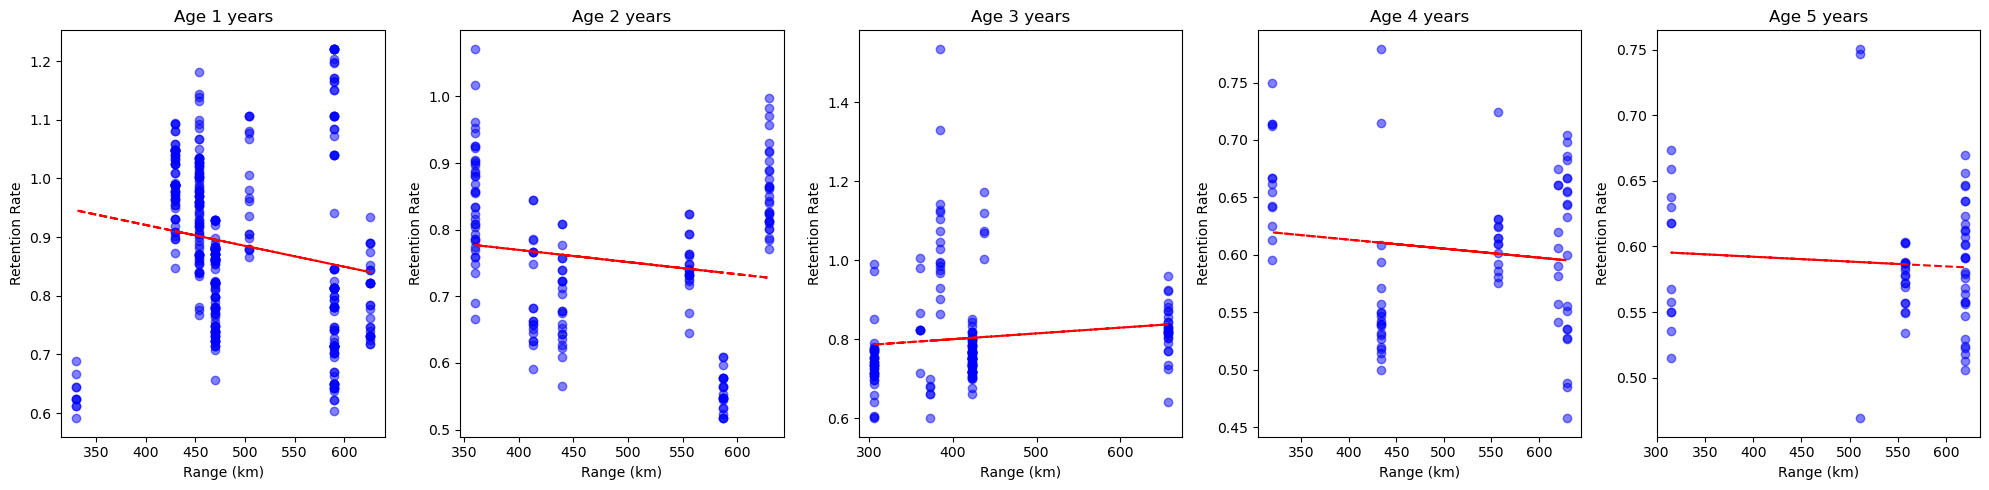

In [6]:
# Plot retention vs age

# Filter data for the specified ages
ages = merged_data['Age'].unique()  # Assuming 'Age' is the column you're interested in
ages = sorted(ages)  # Sort ages if necessary

# Begin plotting
fig, axs = plt.subplots(1, len(ages), figsize=(20, 5))  # 1 row, n columns for subplots

# Function to plot scatter and trendline
def plot_scatter_with_trendline(ax, x, y, label, color):
    ax.scatter(x, y, alpha=0.5, label=f'{label} Data Points', color=color)
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_squared = r_value**2
    
    # Plot the linear regression line
    ax.plot(x, intercept + slope * x, color='red', linestyle='--', label=f'{label} Trendline')
    
    ax.set_title(f'Age {label} years')
    ax.set_xlabel('Range (km)')
    ax.set_ylabel('Retention Rate')
    
    # Print out the statistics
    print(f"Age {label} Linear Regression:")
    print(f"  Gradient: {slope:.4f}")
    print(f"  Intercept: {intercept:.4f}")
    print(f"  R^2: {r_squared:.4f}")
    print(f"  P-value: {p_value:.4e}\n")

# Plot each age group in different subplots
for index, age in enumerate(ages):
    subset = merged_data[merged_data['Age'] == age]

    # Plot scatter with trendline
    plot_scatter_with_trendline(axs[index], subset['Range'], subset['Retention Rate'], age, 'blue')

plt.tight_layout()
plt.show()


In [7]:
# Use this to show no real correlation